In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import skimage.draw
import numpy as np
from tqdm import tqdm
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


'''Structure dataset in two folders'''

def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
        
        
label_map = {'Epithelial':1,
             'Lymphocyte':2,
             'Macrophage':4,
             'Neutrophil':3,
            }


# Root directory of the project
ROOT_DIR = os.path.abspath(".")

# Training file directory
#DATASET = os.path.join(ROOT_DIR, "dataset", "MURA-v1.1/")
#FOLDER = os.path.join(ROOT_DIR, "dataset")
#PATH = DATASET
#print(PATH)

In [65]:
def pad(im, desired_size = 900):
    "pad image"
    old_size = im.shape[:2] # old_size is in (height, width) format
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format
    im = cv2.resize(im, (new_size[1], new_size[0]))
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    
    return new_im


def read_nuclei(path):
    "read raw data"

    # Load 4-channel image
    img = skimage.io.imread(path)
    
    # input image
    if len(img.shape) > 2:
        img = img[:,:,:3]
    # mask
    else:
        # do nothing
        pass
        
    return img



def save_nuclei(path, img):
    "save image"
    skimage.io.imsave(path, img)
    

(1024, 1024)
uint8


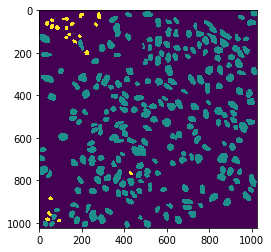

In [66]:
image = read_nuclei("m1.png")
print(image.shape)
print(image.dtype)
plt.imshow(image)

In [67]:
val = image.flatten()
max(val)

np.unique(val)

Array([0, 1, 2], dtype=uint8)

(1170, 1090, 3)
uint8


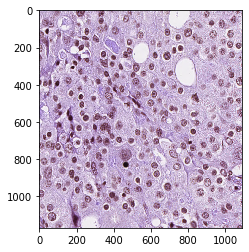

In [68]:
image = read_nuclei("x.tif")
print(image.shape)
print(image.dtype)
plt.imshow(image)

In [69]:
val = image.flatten()
max(val)

np.unique(val)

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

In [37]:
val = image.flatten()
max(val)

# for ground truth mask
# returns multiple values after padding, it should not!
np.unique(val)

array([  0,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

In [38]:
image[150,150]

array([173, 148, 206], dtype=uint8)

In [39]:
image[:,:,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [40]:
image[:,:,3] # yes!

IndexError: index 3 is out of bounds for axis 2 with size 3

In [41]:
image[:,:,:3].shape

(400, 400, 3)

(1170, 1090)
float64


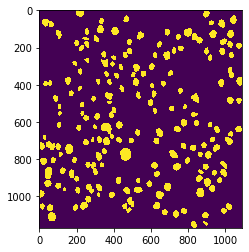

In [42]:
y_ep = read_nuclei("y_ep.tif")
print(y_ep.shape)
print(y_ep.dtype)
plt.imshow(y_ep)

In [43]:
val = y_ep.flatten()
max(val)

np.unique(val)

array([  0., 255.])

In [44]:
test = np.where(y_ep==255.0, 1.0, y_ep) 
test.shape

(1170, 1090)

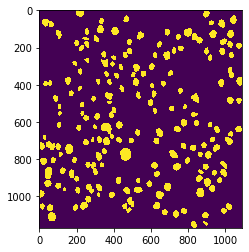

In [45]:
plt.imshow(test)

In [46]:
val = test.flatten()
max(val)

np.unique(val)

array([0., 1.])

In [47]:
test.dtype

dtype('float64')

(1170, 1090)
float64


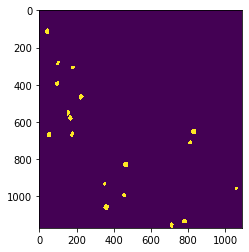

In [48]:
y_ly = read_nuclei("y_ly.tif")
print(y_ly.shape)
print(y_ly.dtype)
plt.imshow(y_ly)

In [49]:
val = y_ly.flatten()
max(val)

np.unique(val)

array([  0., 255.])

In [50]:
test2 = np.where(y_ly==255.0, 2.0, y_ly) 
test2.shape

(1170, 1090)

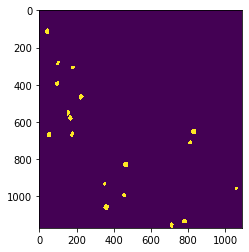

In [51]:
plt.imshow(test2)

In [52]:
val = test2.flatten()
max(val)

np.unique(val)

array([0., 2.])

In [53]:
test2.dtype

dtype('float64')

In [54]:
# overlay two masks

mask = np.maximum(test, test2)
mask.shape

(1170, 1090)

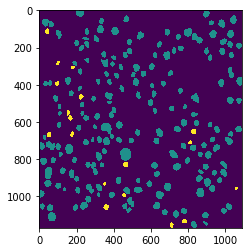

In [55]:
plt.imshow(mask)

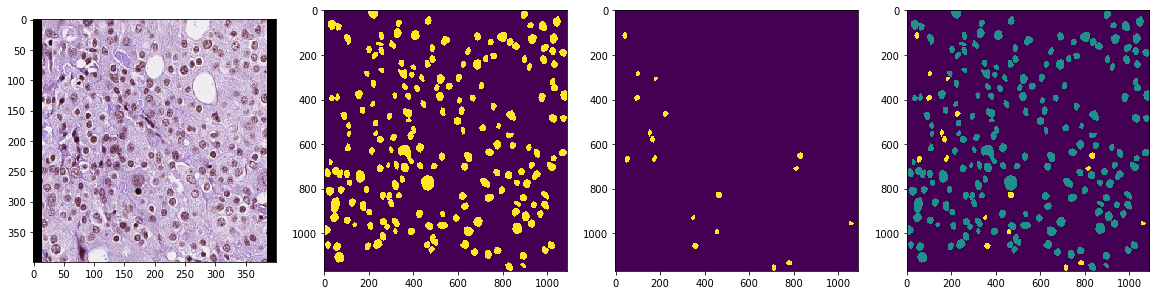

In [56]:
f, axarr = plt.subplots(1,4, figsize=(20,20))

axarr[0].imshow(image)
axarr[1].imshow(test)
axarr[2].imshow(test2)
axarr[3].imshow(mask)

In [57]:
np.unique(mask)

array([0., 1., 2.])

In [58]:
#def process(img):
#    plt.figure(figsize=(8,8))
#    plt.imshow(img)
    
#images = [image, mask]
#for file in images:
#    process(file)

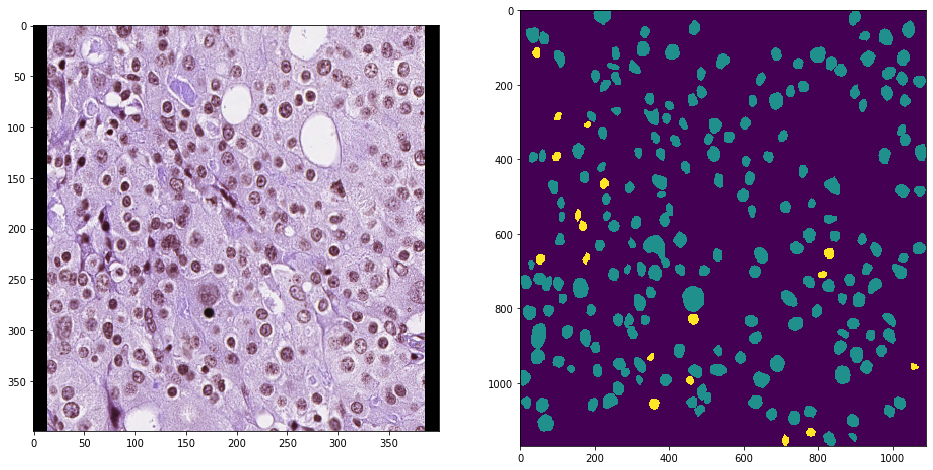

In [59]:
f, axarr = plt.subplots(1,2, figsize=(16,16))

axarr[0].imshow(image)
axarr[1].imshow(mask)